In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import venn

In [3]:
def visualize_accuracies(df):
    df[['acc@1', 'acc@2', 'acc@3']].plot(kind='hist', alpha=0.5, bins=30)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of acc@1, acc@2, acc@3')
    plt.legend(['acc@1', 'acc@2', 'acc@3'])
    plt.show()

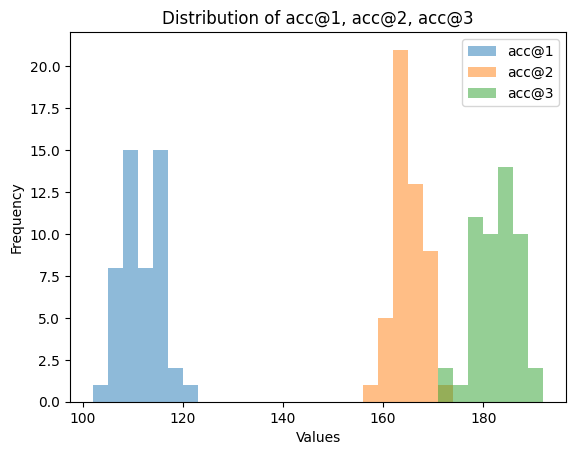

In [7]:
visualize_accuracies(pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R15_N50.csv'))

In [6]:
pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R15_N50.csv')['acc@1'].describe()

count     50.000000
mean     111.340000
std        3.910269
min      102.000000
25%      108.000000
50%      111.000000
75%      114.750000
max      122.000000
Name: acc@1, dtype: float64

In [10]:
pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R5_N50.csv')['acc@1'].describe()

count     50.000000
mean     102.180000
std        5.826365
min       88.000000
25%       97.500000
50%      102.000000
75%      105.000000
max      114.000000
Name: acc@1, dtype: float64

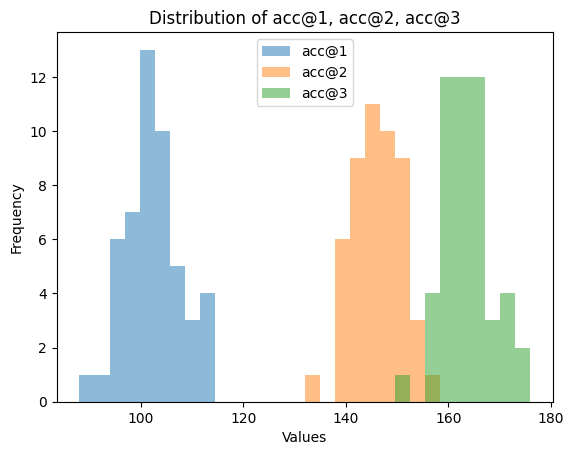

In [6]:
visualize_accuracies(pd.read_csv('../sampled_fl_results/d4j_llama3_stability_R5_N50.csv'))

In [20]:
def read_combined_fl_result(path,k=1):
    with open(path) as f:
        result = json.load(f)
    buggy_methods = result['buggy_methods']
    ranked_at_k = set() 
    for i, (_, methods) in enumerate(buggy_methods.items()):
        if not methods:
            continue

        for rank in methods.values():
            if rank['autofl_rank'] <= k:
                ranked_at_k.add(i)
                break
    
    return ranked_at_k

/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((


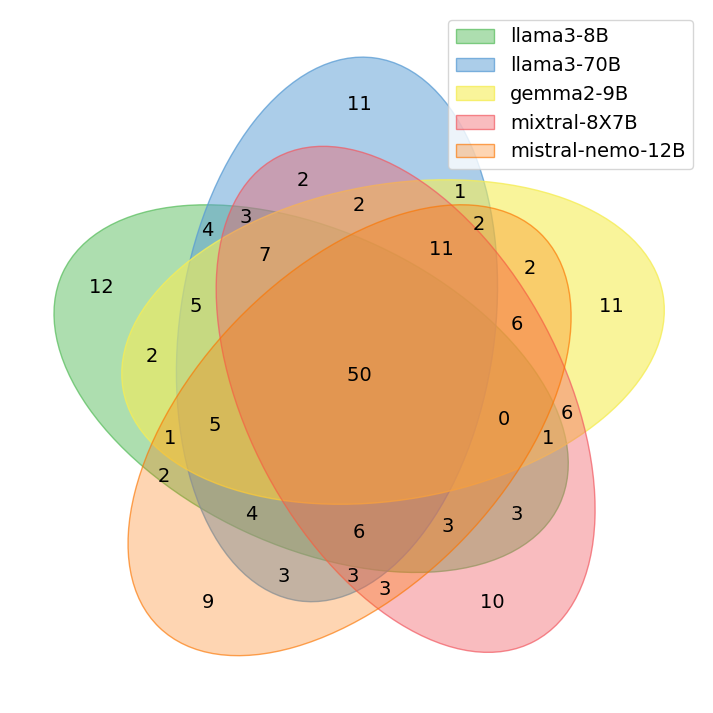

In [23]:
target_paths = [\
    '../combined_fl_results/d4j_llama3_template2.json',\
    '../combined_fl_results/d4j_llama3_70B_template2.json',\
    '../combined_fl_results/d4j_gemma2_template2.json',\
    '../combined_fl_results/d4j_mixtral_template2.json',\
    '../combined_fl_results/d4j_mistral_nemo_template2.json',\
]
target_sets = [read_combined_fl_result(path) for path in target_paths]

labels = venn.get_labels(target_sets, fill=['number'])
venn.venn3(labels, names=['llama3-8B', 'llama3-70B', 'gemma2-9B', 'mixtral-8X7B', 'mistral-nemo-12B'])
plt.show()

/Users/hyunjoon/anaconda3/envs/openllms/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((


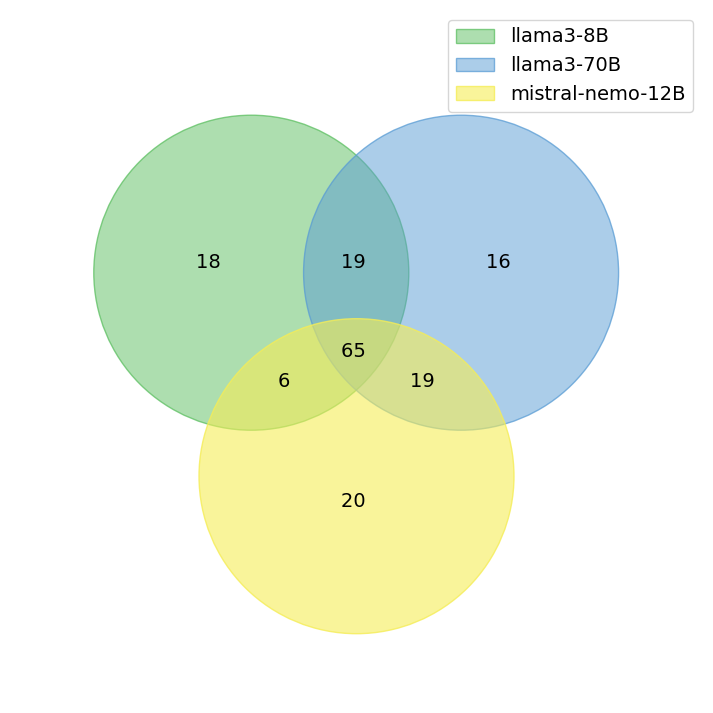

In [24]:
target_paths = [\
    '../combined_fl_results/d4j_llama3_template2.json',\
    '../combined_fl_results/d4j_llama3_70B_template2.json',\
    '../combined_fl_results/d4j_mistral_nemo_template2.json',\
]
target_sets = [read_combined_fl_result(path) for path in target_paths]

labels = venn.get_labels(target_sets, fill=['number'])
venn.venn3(labels, names=['llama3-8B', 'llama3-70B', 'mistral-nemo-12B'])
plt.show()